# Importing Data and create the data structure

# Split the Data to train and test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
import time
tic = time.time()
rating = pd.read_csv('ml-25m/ratings.csv')
movies = pd.read_csv('ml-25m/movies.csv')
toc = time.time()
print(toc - tic)

1824.2676730155945


In [3]:
rating.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [4]:
def data_structure(data, test_size=0.2):
        """Split data into train/test sets and create user and movie maps."""
        np.random.shuffle(data)
        user_map, movie_map = {}, {}
        user_rating, movie_rating = [], []
        data_by_user_train, data_by_user_test = [], []
        data_by_movie_train, data_by_movie_test = [], []

        user_ids, movie_ids, ratings = data[:, 0], data[:, 1], data[:, 2]

        for i in range(len(data)):
            user, movie, rating = user_ids[i], movie_ids[i], ratings[i]

            if user not in user_map:
                user_map[user] = len(user_rating)
                user_rating.append([])
                data_by_user_train.append([])
                data_by_user_test.append([])

            if movie not in movie_map:
                movie_map[movie] = len(movie_rating)
                movie_rating.append([])
                data_by_movie_train.append([])
                data_by_movie_test.append([])

            user_idx, movie_idx = user_map[user], movie_map[movie]
            user_rating[user_idx].append((movie, rating))
            movie_rating[movie_idx].append((user_idx, rating))

        for user_idx, ratings in enumerate(user_rating):
            if len(ratings) > 1:
                np.random.shuffle(ratings)
                split_point = int(len(ratings) * (1 - test_size))
                data_by_user_train[user_idx].extend(ratings[:split_point])
                data_by_user_test[user_idx].extend(ratings[split_point:])
            else:
                data_by_user_train[user_idx].extend(ratings)

        for movie_idx, ratings in enumerate(movie_rating):
            if len(ratings) > 1:
                np.random.shuffle(ratings)
                split_point = int(len(ratings) * (1 - test_size))
                data_by_movie_train[movie_idx].extend(ratings[:split_point])
                data_by_movie_test[movie_idx].extend(ratings[split_point:])
            else:
                data_by_movie_train[movie_idx].extend(ratings)

        return (
            data_by_user_train,
            data_by_movie_train,
            data_by_user_test,
            data_by_movie_test,
            user_map,
            movie_map,
        )

In [5]:
rating = rating[['userId', 'movieId', 'rating']].to_numpy()

In [6]:
result = data_structure(rating, test_size=0.2)

In [7]:
import time
tic = time.time()
(
            data_by_user_train,
            data_by_movie_train,
            data_by_user_test,
            data_by_movie_test,
            user_map,
            movie_map,
        ) = result
toc = time.time()
print(toc - tic)

2.6941299438476562e-05


# Plots

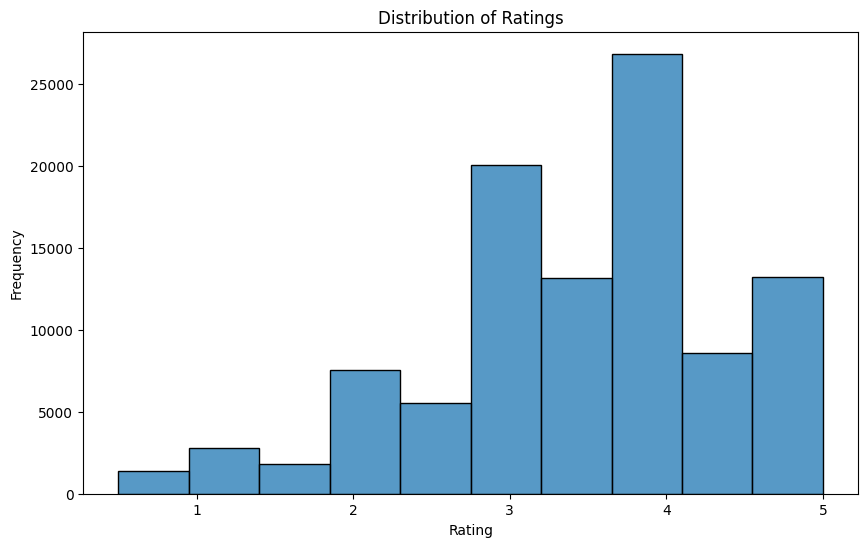

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(rating['rating'], bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig("distribution_of_ratings.pdf", format='pdf')
plt.show()

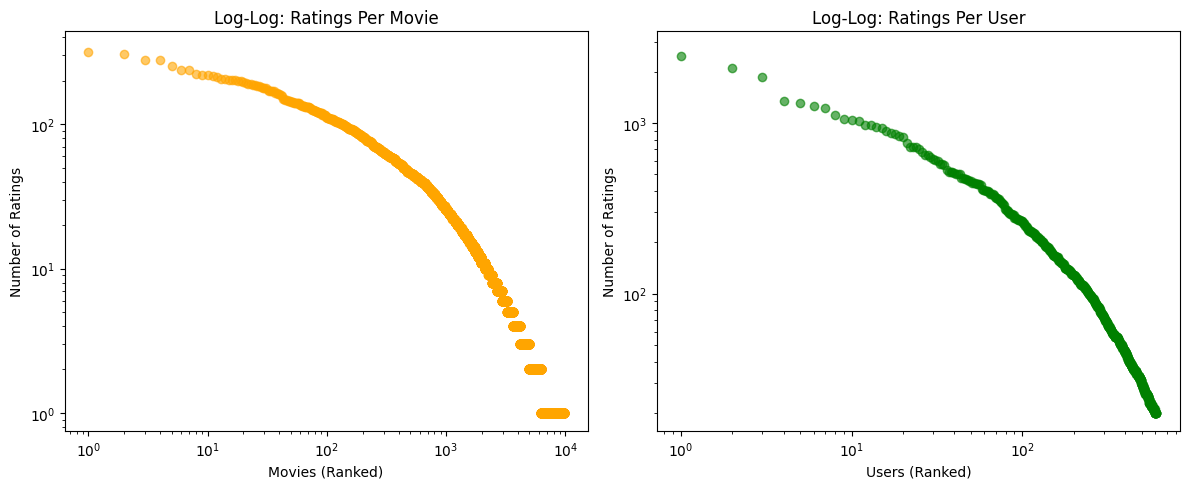

In [ ]:
# Power law analysis
def plot_power_law_scatter(data_by_user, data_by_movie, save_path="power_law_analysis.pdf"):
    ratings_per_movie = [len(ratings) for ratings in data_by_movie.values()]
    ratings_per_user = [len(ratings) for ratings in data_by_user.values()]

    ratings_per_movie.sort(reverse=True)
    ratings_per_user.sort(reverse=True)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(range(len(ratings_per_movie)), ratings_per_movie, color='orange', alpha=0.6)
    plt.xscale("log")
    plt.yscale("log")
    plt.title("Log-Log: Ratings Per Movie")
    plt.xlabel("Movies (Ranked)")
    plt.ylabel("Number of Ratings")

    plt.subplot(1, 2, 2)
    plt.scatter(range(len(ratings_per_user)), ratings_per_user, color='green', alpha=0.6)
    plt.xscale("log")
    plt.yscale("log")
    plt.title("Log-Log: Ratings Per User")
    plt.xlabel("Users (Ranked)")
    plt.ylabel("Number of Ratings")

    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

plot_power_law_scatter(user_rating_list, data_by_movie)

<ipython-input-60-efe2d24650b4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=genres, order=genres.value_counts().index, palette="viridis")


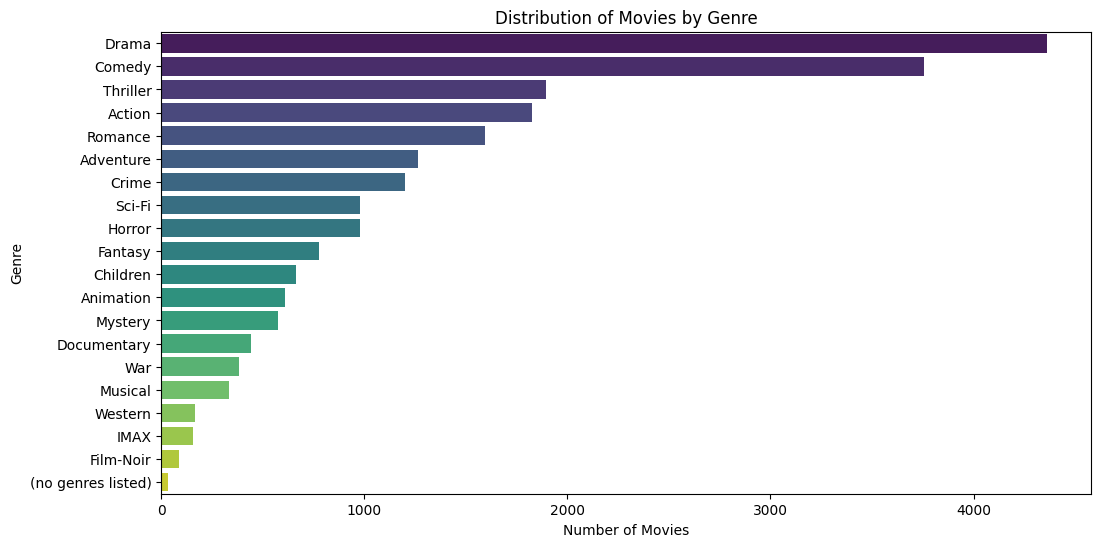

In [ ]:
genres = movies['genres'].str.split('|').explode()

plt.figure(figsize=(12, 6))
sns.countplot(y=genres, order=genres.value_counts().index, palette="viridis")
plt.title('Distribution of Movies by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.savefig("Distribution_of_Movies_by_Genre.pdf", format='pdf')
plt.show()

<ipython-input-61-2950326e89c2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_genre.values, y=avg_rating_by_genre.index, palette="coolwarm")


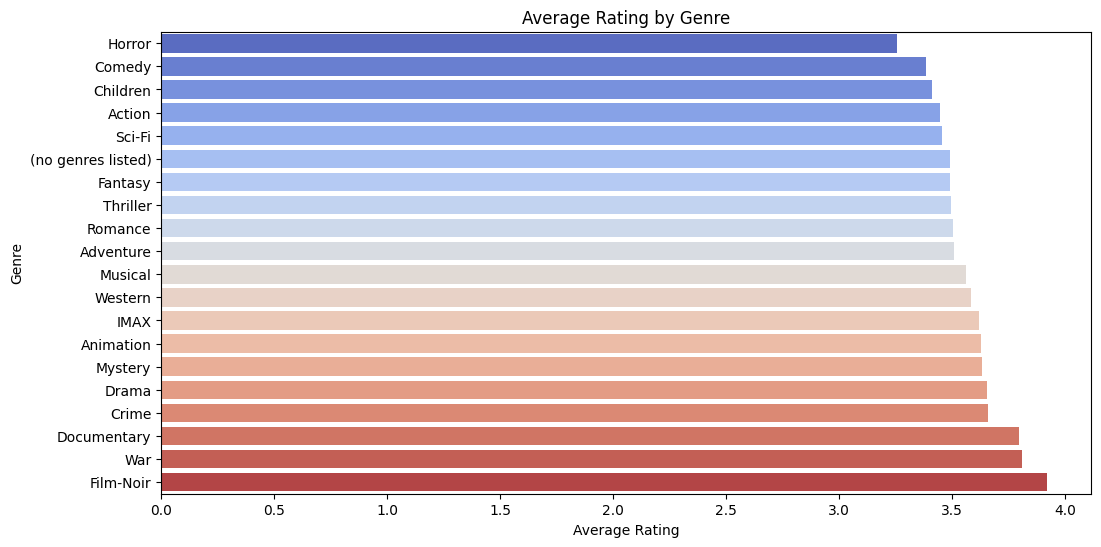

In [ ]:
merged_data = pd.merge(rating, movies, on='movieId')

merged_data['genres'] = merged_data['genres'].str.split('|')
merged_data_exploded = merged_data.explode('genres')
avg_rating_by_genre = merged_data_exploded.groupby('genres')['rating'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_genre.values, y=avg_rating_by_genre.index, palette="coolwarm")
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.savefig("Average_Rating_by_Genre.pdf", format='pdf')
plt.show()


<ipython-input-62-136cdfa90c62>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_count_by_genre.values, y=rating_count_by_genre.index, palette="magma")


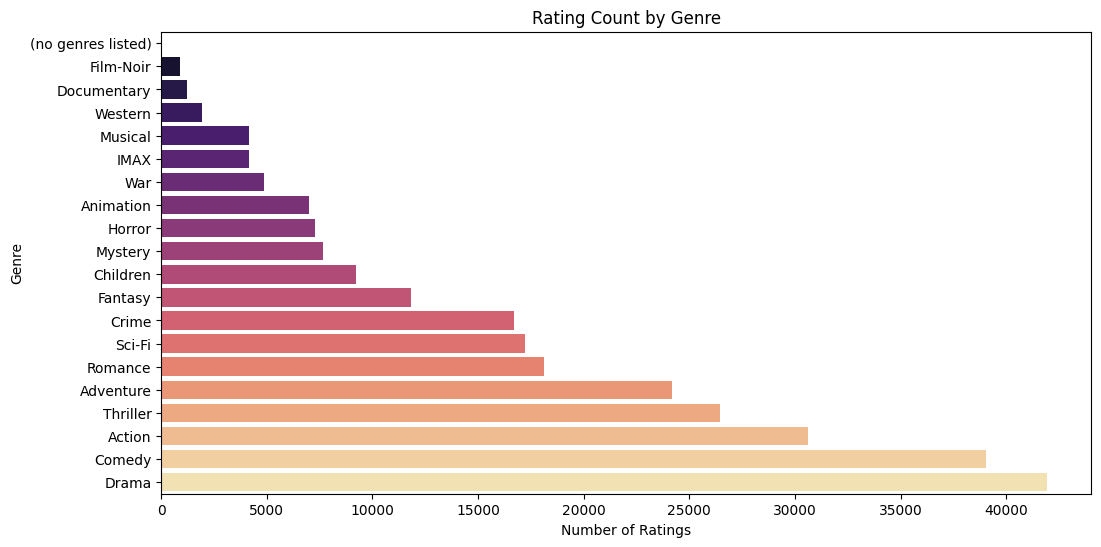

In [ ]:
rating_count_by_genre = merged_data_exploded.groupby('genres')['rating'].count().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=rating_count_by_genre.values, y=rating_count_by_genre.index, palette="magma")
plt.title('Rating Count by Genre')
plt.xlabel('Number of Ratings')
plt.ylabel('Genre')
plt.savefig("Rating_Count_by_Genre.pdf", format='pdf')
plt.show()


# Bias Only Model

In [ ]:
def compute_loss(user_rating_list, user_bias, movie_bias, movie_idx_map, lambdaa, gamma):
    total_loss = 0
    count = 0

    for user, ratings in enumerate(user_rating_list):
        for entry in ratings:
            if len(entry) == 2:
                movie_id, rating = entry
                movie_index = movie_idx_map[movie_id]
                prediction = user_bias[user] + movie_bias[movie_index]
                error = rating - prediction
                total_loss += error ** 2
                bb = (gamma / 2) * ((user_bias[user] ** 2) + (movie_bias[movie_index] ** 2))
                count += 1

    final_loss = (-((1 / 2 ) * lambdaa) * (total_loss / count)) - bb

    return final_loss

In [ ]:
def compute_rmse(user_rating_list, user_bias, movie_bias, movie_idx_map):
    total_error = 0
    total_count = 0

    for user, ratings in enumerate(user_rating_list):
        for entry in ratings:
            if len(entry) == 2:
                movie_id, rating = entry
                movie_index = movie_idx_map[movie_id]
                prediction = user_bias[user] + movie_bias[movie_index]
                error = rating - prediction
                total_error += error ** 2
                total_count += 1

    rmse = np.sqrt(total_error / total_count)

    return rmse

In [ ]:
lambdaa = 0.1
gamma = 0.03
iterations = 20

user_bias = np.random.rand(len(user_rating_list))
movie_bias = np.random.rand(len(movie_idx_map))

train_loss_values = []
train_rmse_values = []
test_loss_values = []
test_rmse_values = []

for i in range(iterations):
    for m in range(len(data_by_user_train)):
        bias = 0
        count = 0
        for entry in data_by_user_train[m]:
            if len(entry) == 2:
                movie_id, rating = entry
                if rating != 0:
                    bias += lambdaa * (rating - movie_bias[movie_idx_map[movie_id]])
                    count += 1
        if count > 0:
            bias /= (lambdaa * count + gamma)
        user_bias[m] = bias

    # Update movie biases using data_by_movie
    for movie_index, users_ratings in enumerate(data_by_movie):
        bias = 0
        count = 0
        for user, rating in users_ratings:
            if rating != 0:
                bias += lambdaa * (rating - user_bias[user])
                count += 1
        if count > 0:
            bias /= (lambdaa * count + gamma)
        movie_bias[movie_index] = bias



    loss = compute_loss(data_by_user_train, user_bias, movie_bias, movie_idx_map, lambdaa, gamma)
    rmse = compute_rmse(data_by_user_train, user_bias, movie_bias, movie_idx_map)

    test_loss = compute_loss(data_by_user_test, user_bias, movie_bias, movie_idx_map, lambdaa, gamma)
    test_rmse = compute_rmse(data_by_user_test, user_bias, movie_bias, movie_idx_map)

    train_rmse_values.append(rmse)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    test_rmse_values.append(test_rmse)

    print(f"Iteration {i + 1}: Train Loss = {loss}, Test Loss = {test_loss}")
    print(f"Iteration {i + 1}: Train RMSE = {rmse}, Test RMSE = {test_rmse}")

Iteration 1: Train Loss = -0.18926366292174915, Test Loss = -0.18696034431817335
Iteration 1: Train RMSE = 0.8048522783993204, Test RMSE = 0.8125081148727472
Iteration 2: Train Loss = -0.19519348064598996, Test Loss = -0.1919354939182945
Iteration 2: Train RMSE = 0.7885094376646283, Test RMSE = 0.7966771970430033
Iteration 3: Train Loss = -0.19714603566771177, Test Loss = -0.19378089719108274
Iteration 3: Train RMSE = 0.7873966488131736, Test RMSE = 0.7955724377319735
Iteration 4: Train Loss = -0.1976913293614932, Test Loss = -0.19431529851313223
Iteration 4: Train RMSE = 0.7872589789274974, Test RMSE = 0.7954018411916066
Iteration 5: Train Loss = -0.19794326181352367, Test Loss = -0.19454838111139983
Iteration 5: Train RMSE = 0.7872255418206604, Test RMSE = 0.7953460084690345
Iteration 6: Train Loss = -0.19817189107106895, Test Loss = -0.19474518029876237
Iteration 6: Train RMSE = 0.7872126143496642, Test RMSE = 0.7953206909573994
Iteration 7: Train Loss = -0.1984177013502845, Test Lo

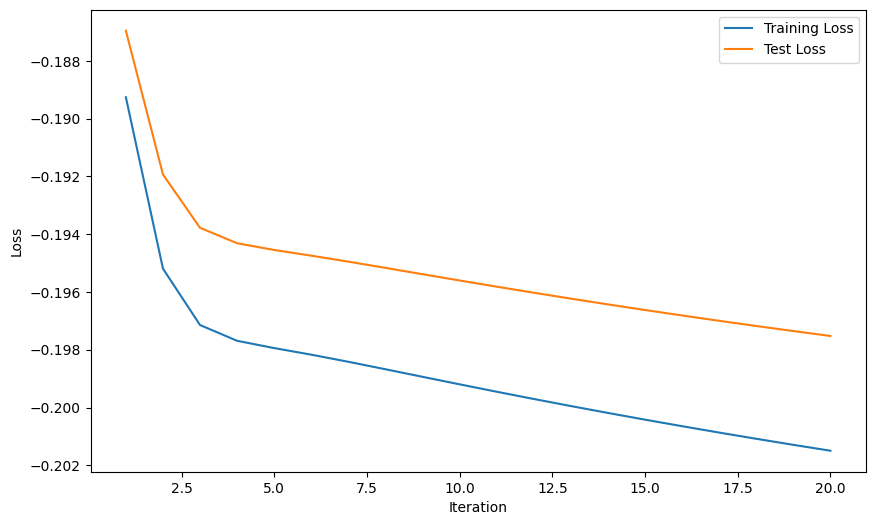

In [ ]:
# Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), train_loss_values, label="Training Loss")
plt.plot(range(1, iterations + 1), test_loss_values, label="Test Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

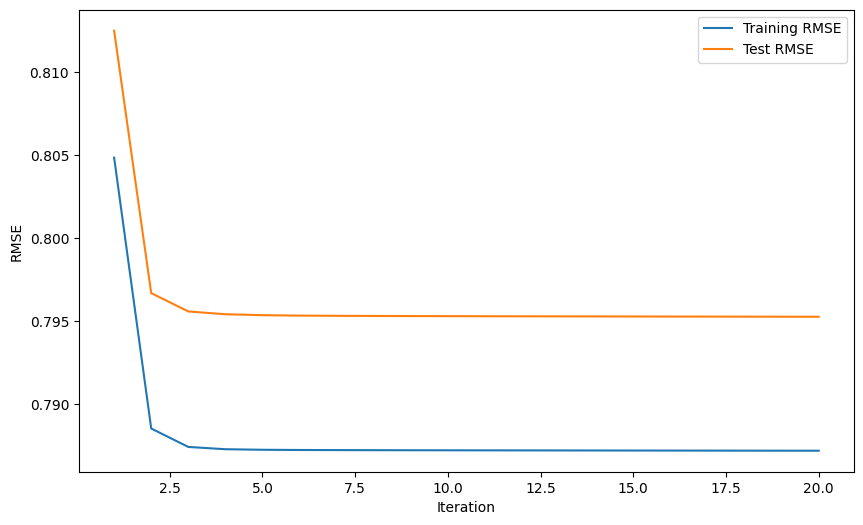

In [ ]:
# RMSE
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), train_rmse_values, label="Training RMSE")
plt.plot(range(1, iterations + 1), test_rmse_values, label="Test RMSE")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend()
plt.show()

# U, V matrices

In [8]:
class utils:

    def save_model(self, file_path):
        param = {
            "user_matrix": self.user_matrix,
            "movie_matrix": self.movie_matrix,
            "user_bias": self.user_bias,
            "movie_bias": self.movie_bias,
            "user_map": self.user_map,
            "movie_map": self.movie_map,
        }
        if not self.user_map or not self.movie_map:
            print("Error: Missing user_map or movie_map.")
        with open(file_path, "wb") as f:
            pickle.dump(param, f)


    def save_recommendations(self, recommendations, file_path):
        with open(file_path, "w") as f:
            for movie_id, rating in recommendations:
                f.write(f"{movie_id},{rating}\n")

    

    def compute_loss(self, data):
        user_ids, movie_ids, ratings = data[:, 0].astype(int), data[:, 1].astype(int), data[:, 2]
        valid_idx = (user_ids < self.num_user) & (movie_ids < self.num_movie)
        user_ids, movie_ids, ratings = user_ids[valid_idx], movie_ids[valid_idx], ratings[valid_idx]

        pred = (
            np.sum(self.user_matrix[user_ids] * self.movie_matrix[movie_ids], axis=1)
            + self.user_bias[user_ids]
            + self.movie_bias[movie_ids]
        )
        errors = ratings - pred

        # Compute RMSE and Loss
        loss = (
            np.sum(errors**2) +
            self.lamda * (np.sum(self.user_bias**2) + np.sum(self.movie_bias**2)) +
            self.tau * (np.sum(self.user_matrix**2) + np.sum(self.movie_matrix**2))
        )
        rmse = np.sqrt(np.mean(errors**2))

        return loss, rmse

In [9]:
class Model(utils):
    def __init__(self, data, latent_d=7, lamda=0.1, gamma=0.04, tau=0.09):
        self.user_data, self.movie_data, self.test_user_data, self.test_movie_data, self.user_map, self.movie_map = data
        self.num_user = len(self.user_data)
        self.num_movie = len(self.movie_data)
        self.latent_d = latent_d
        self.lamda = lamda
        self.gamma = gamma
        self.tau = tau

        self.user_matrix = np.random.normal(0, 1 / np.sqrt(latent_d), (self.num_user, latent_d))
        self.movie_matrix = np.random.normal(0, 1 / np.sqrt(latent_d), (self.num_movie, latent_d))
        self.user_bias = np.zeros(self.num_user)
        self.movie_bias = np.zeros(self.num_movie)

    def predict(self, user_idx, movie_idx):
        """Predict the rating for a given user and movie index."""
        return (
            np.dot(self.user_matrix[user_idx], self.movie_matrix[movie_idx])
            + self.user_bias[user_idx]
            + self.movie_bias[movie_idx]
        )

    def test_model(self, num_samples=5):
        """Evaluate the model on test data and print sample predictions."""
        predictions = []
        for user_idx, ratings in enumerate(self.test_user_data):
            for movie_id, true_rating in ratings[:num_samples]:
                if movie_id in self.movie_map:
                    movie_idx = self.movie_map[movie_id]
                    pred_rating = self.predict(user_idx, movie_idx)
                    predictions.append((user_idx, movie_id, true_rating, pred_rating))
        return predictions

    def _update_users(self):
        """Update user latent factors and biases."""
        for user_idx in range(self.num_user):
            rated_movies = [
                self.movie_map[movie] for movie, _ in self.user_data[user_idx]
                if movie in self.movie_map and isinstance(self.movie_map[movie], int)
            ]
            if not rated_movies:
                continue

            R_u = np.array([rating for movie, rating in self.user_data[user_idx] if movie in self.movie_map])
            M_u = self.movie_matrix[rated_movies]

            A = self.lamda * M_u.T @ M_u + self.tau * np.eye(self.latent_d)
            b = self.lamda * M_u.T @ (R_u - self.movie_bias[rated_movies])
            self.user_matrix[user_idx] = np.linalg.solve(A, b)

            self.user_bias[user_idx] = (
                np.mean(R_u - (self.user_matrix[user_idx] @ M_u.T) - self.movie_bias[rated_movies])
            )

    def _update_movies(self):
        """Update movie latent factors and biases."""
        for movie_idx in range(self.num_movie):
            rated_users = [
                user for user, _ in self.movie_data[movie_idx]
                if isinstance(user, int) and 0 <= user < len(self.user_matrix)
            ]
            if not rated_users:
                continue

            R_m = np.array([rating for _, rating in self.movie_data[movie_idx]])
            U_m = self.user_matrix[rated_users]

            # Regularization with gamma
            A = self.lamda * U_m.T @ U_m + self.tau * np.eye(self.latent_d)
            b = self.lamda * U_m.T @ (R_m - self.user_bias[rated_users])
            self.movie_matrix[movie_idx] = np.linalg.solve(A, b)

            self.movie_bias[movie_idx] = (
                np.mean(R_m - (self.movie_matrix[movie_idx] @ U_m.T) - self.user_bias[rated_users])
            )

    def fit(self, epochs=15, progress_callback=None):
        train_metrics = {"loss": [], "rmse": []}
        test_metrics = {"loss": [], "rmse": []}

        for epoch in range(epochs):
            print(f"Starting epoch {epoch + 1}...")
            self._update_users()
            self._update_movies()

            try:
                train_loss, train_rmse = self.compute_loss(
                    self.flatten_data(self.user_data, self.user_map, self.movie_map)
                )
                test_loss, test_rmse = self.compute_loss(
                    self.flatten_data(self.test_user_data, self.user_map, self.movie_map)
                )
                train_metrics["loss"].append(train_loss)
                train_metrics["rmse"].append(train_rmse)
                test_metrics["loss"].append(test_loss)
                test_metrics["rmse"].append(test_rmse)

                print(
                    f"Epoch {epoch + 1}: Train Loss = {train_loss:.4f}, Train RMSE = {train_rmse:.4f} | "
                    f"Test Loss = {test_loss:.4f}, Test RMSE = {test_rmse:.4f}"
                )

                if progress_callback:
                    progress_callback(epoch + 1, epochs, train_loss, train_rmse)
            except Exception as e:
                print(f"Error in epoch {epoch + 1}: {str(e)}")
                break

        return train_metrics, test_metrics

    @staticmethod
    def flatten_data(data, user_map, movie_map):
        flattened = []
        for user_idx, ratings in enumerate(data):
            for movie_id, rating in ratings:
                if movie_id in movie_map:
                    flattened.append((user_idx, movie_map[movie_id], rating))
        return np.array(flattened, dtype=np.float32)

In [10]:
model = Model(
        data=(data_by_user_train, data_by_movie_train, data_by_user_test, data_by_movie_test, user_map, movie_map),
        latent_d=10,
        lamda=0.01,
        gamma=0.01,
        tau=0.1
    )

In [11]:
train_metrics, test_metrics = model.fit(epochs=20)

Starting epoch 1...
Epoch 1: Train Loss = 15337526.5624, Train RMSE = 0.8753 | Test Loss = 4054093.4516, Test RMSE = 0.8878
Starting epoch 2...
Epoch 2: Train Loss = 15537432.5511, Train RMSE = 0.8767 | Test Loss = 4217558.0513, Test RMSE = 0.8889
Starting epoch 3...
Epoch 3: Train Loss = 14166755.0895, Train RMSE = 0.8306 | Test Loss = 4008420.0350, Test RMSE = 0.8427
Starting epoch 4...
Epoch 4: Train Loss = 13524599.2855, Train RMSE = 0.8093 | Test Loss = 3895288.9258, Test RMSE = 0.8229
Starting epoch 5...
Epoch 5: Train Loss = 13046936.3237, Train RMSE = 0.7944 | Test Loss = 3790425.2826, Test RMSE = 0.8103
Starting epoch 6...
Epoch 6: Train Loss = 12882098.5943, Train RMSE = 0.7895 | Test Loss = 3752915.2985, Test RMSE = 0.8067
Starting epoch 7...
Epoch 7: Train Loss = 12805771.6938, Train RMSE = 0.7873 | Test Loss = 3731199.8301, Test RMSE = 0.8052
Starting epoch 8...
Epoch 8: Train Loss = 12736544.8678, Train RMSE = 0.7853 | Test Loss = 3711300.7673, Test RMSE = 0.8037
Starting

In [12]:
model.save_model("trained_model.pkl")
np.save("user_matrix.npy", model.user_matrix)
np.save("movie_matrix.npy", model.movie_matrix)

In [13]:
train_rmse = train_metrics["rmse"]
test_rmse = test_metrics["rmse"]
train_loss = train_metrics["loss"]
test_loss = test_metrics["loss"]

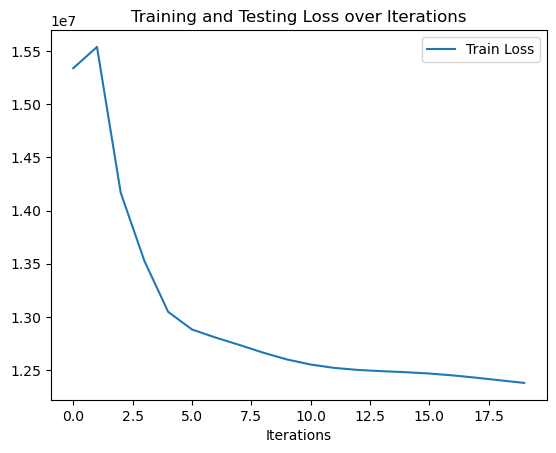

In [14]:
# Plot Loss
plt.plot(train_loss, label="Train Loss")
# plt.plot(test_loss, label="Test Loss")
plt.xlabel("Iterations")
# plt.ylabel("Loss")
plt.title("Training and Testing Loss over Iterations")
plt.legend()
plt.show()

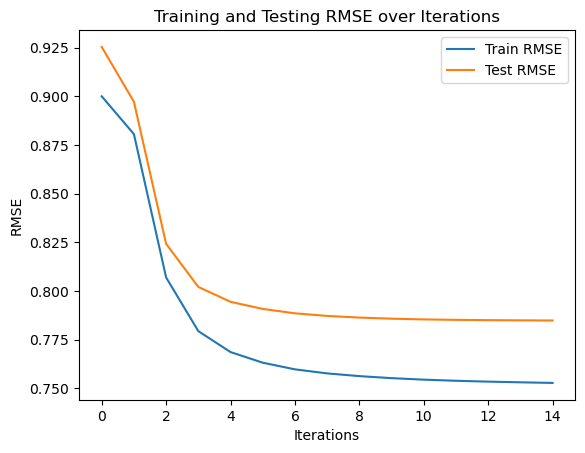

In [61]:
# Plot RMSE
plt.plot(train_rmse, label="Train RMSE")
plt.plot(test_rmse, label="Test RMSE")
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.title("Training and Testing RMSE over Iterations")
plt.legend()
plt.savefig("Training_and_Testing_RMSE_over_Iterations_UV.pdf", format='pdf')
plt.show()


# Dummy User

In [16]:
# Load the model
with open("trained_model.pkl", "rb") as f:
    model_params = pickle.load(f)

# Access parameters
user_matrix = model_params["user_matrix"]
movie_matrix = model_params["movie_matrix"]
user_bias = model_params["user_bias"]
movie_bias = model_params["movie_bias"]
user_map = model_params["user_map"]
movie_map = model_params["movie_map"]

print("Model loaded successfully.")

Model loaded successfully.


In [17]:
# Create a dictionary to map movieId to title
movie_id_to_title = dict(zip(movies['movieId'], movies['title']))

In [18]:
latent_d = 10   
lamda = 0.01    
gamma = 0.01   
tau = 0.1       

In [19]:
def calculate_dummy_user_bias(user_dummy, iterations, dummy_user_latent):
    bias_sum = 0
    item_counter = 0
    for i in range(len(user_dummy)):
        movie_id = user_dummy[i][0]
        rating = user_dummy[i][1]
        movie_index = movie_map[movie_id]  

        if iterations == 0:
            bias_sum += lamda * (rating - movie_bias[movie_index])
        else:
            bias_sum += lamda * (
                rating -
                (np.dot(dummy_user_latent.T, movie_matrix[movie_index]) + movie_bias[movie_index])
            )

        item_counter += 1

    if item_counter > 0:
        bias = bias_sum / ((lamda * item_counter) + tau)
        return bias
    return 0


def update_user_latent_dummy(user_dummy, dummy_user_bias):
    x = np.zeros(latent_d)  
    y = np.zeros((latent_d, latent_d))
    for j in range(len(user_dummy)):
        actual_rating = user_dummy[j][1]
        movie_id = user_dummy[j][0]
        movie_index = movie_map[movie_id]  
        error = actual_rating - dummy_user_bias - movie_bias[movie_index]
        x += movie_matrix[movie_index] * error
        y += np.outer(movie_matrix[movie_index], movie_matrix[movie_index])

    y += np.identity(latent_d) * tau 
    return np.matmul(np.linalg.inv(lamda * y), lamda * x)

In [20]:
# Dummy user initialization
dummy_movie_id = int(input("Enter the Movie ID you want to use for the dummy user: "))
movie_title = movie_id_to_title.get(dummy_movie_id, None)

In [21]:
if movie_title:
    print(f"Using Movie ID: {dummy_movie_id}, Title: {movie_title}")

    data_by_user_train.append([(dummy_movie_id, 5.0)])

    dummy_user_latent = np.zeros(latent_d)  # Changed `k` to `latent_d`
    dummy_user_bias = 0
    iterations = 10

    for _ in range(iterations):
        dummy_user_bias = calculate_dummy_user_bias(data_by_user_train[-1], _, dummy_user_latent)
        dummy_user_latent = update_user_latent_dummy(data_by_user_train[-1], dummy_user_bias)

    scores = []
    for movie_id, movie_idx in movie_map.items():
        movie_vector = movie_matrix[movie_idx] 
        score = np.dot(dummy_user_latent, movie_vector) + dummy_user_bias + movie_bias[movie_idx]
        scores.append((movie_id, score))

    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    filtered_scores = [
        item for item in sorted_scores if len(data_by_movie_train[movie_map[item[0]]]) >= 100 
    ]

    print("\nTop Recommendations for Dummy User:")
    for movie_id, score in filtered_scores[:20]:
        movie_name = movie_id_to_title.get(movie_id, "Unknown Movie")
        print(f"Movie ID: {movie_id}, Title: {movie_name}, Score: {score}")
else:
    print(f"Movie ID {dummy_movie_id} not found in the dataset.")


Using Movie ID: 1, Title: Toy Story (1995)

Top Recommendations for Dummy User:
Movie ID: 34435.0, Title: Sholay (1975), Score: 5.0100709252142135
Movie ID: 78499.0, Title: Toy Story 3 (2010), Score: 4.267642629650952
Movie ID: 1.0, Title: Toy Story (1995), Score: 4.212480921947059
Movie ID: 73513.0, Title: Swades: We, the People (Our Country) (2004), Score: 4.154788003959417
Movie ID: 26133.0, Title: Charlie Brown Christmas, A (1965), Score: 4.118362969908589
Movie ID: 899.0, Title: Singin' in the Rain (1952), Score: 4.108780764192446
Movie ID: 3928.0, Title: Abbott and Costello Meet Frankenstein (1948), Score: 4.089486830765053
Movie ID: 3114.0, Title: Toy Story 2 (1999), Score: 4.068273873794936
Movie ID: 6377.0, Title: Finding Nemo (2003), Score: 3.793724937904767
Movie ID: 595.0, Title: Beauty and the Beast (1991), Score: 3.7930927255187497
Movie ID: 919.0, Title: Wizard of Oz, The (1939), Score: 3.7099297405564386
Movie ID: 953.0, Title: It's a Wonderful Life (1946), Score: 3.704

# U, V and Features

In [22]:
# Initialize feature vectors for genres
genres = movies.set_index('movieId')['genres'].to_dict()
genre_list = list(set("|".join(movies['genres']).split("|")))
genre_map = {genre: idx for idx, genre in enumerate(genre_list)}
num_features = len(genre_list)

In [23]:
feature_vectors = np.zeros((num_features, len(movie_map)))
for movie_id, movie_idx in movie_map.items():
    movie_genres = genres[movie_id].split("|")
    for genre in movie_genres:
        if genre in genre_map:
            feature_vectors[genre_map[genre], movie_idx] = 1

In [24]:
user_bias = np.zeros(len(data_by_user_train))
movie_bias = np.zeros(len(movie_map))
user_matrix = np.random.normal(loc=0, scale=1 / np.sqrt(latent_d), size=(latent_d, len(data_by_user_train)))
movie_matrix = np.random.normal(loc=0, scale=1 / np.sqrt(latent_d), size=(latent_d, len(movie_map)))
genre_matrix = np.random.normal(loc=0, scale=1 / np.sqrt(latent_d), size=(latent_d, num_features))

In [25]:
class utils:
    def save_model(self, file_path):
        param = {
            "user_matrix": self.user_matrix,
            "movie_matrix": self.movie_matrix,
            "user_bias": self.user_bias,
            "movie_bias": self.movie_bias,
            "user_map": self.user_map,
            "movie_map": self.movie_map,
            "genre_matrix": self.genre_matrix,
            "feature_vectors": self.feature_vectors,
        }
        if not self.user_map or not self.movie_map:
            print("Error: Missing user_map or movie_map.")
        with open(file_path, "wb") as f:
            pickle.dump(param, f)

    def save_recommendations(self, recommendations, file_path):
        with open(file_path, "w") as f:
            for movie_id, rating in recommendations:
                f.write(f"{movie_id},{rating}\n")

    def compute_loss(self, data):
        user_ids, movie_ids, ratings = data[:, 0].astype(int), data[:, 1].astype(int), data[:, 2]
        valid_idx = (user_ids < self.num_user) & (movie_ids < self.num_movie)
        user_ids, movie_ids, ratings = user_ids[valid_idx], movie_ids[valid_idx], ratings[valid_idx]

        # Include feature contributions in predictions
        feature_contributions = np.dot(self.genre_matrix, self.feature_vectors[:, movie_ids])  # Feature projections
        pred = (
            np.sum(self.user_matrix[user_ids] * self.movie_matrix[movie_ids], axis=1)
            + np.sum(feature_contributions, axis=0)  # Add feature influence
            + self.user_bias[user_ids]
            + self.movie_bias[movie_ids]
        )
        errors = ratings - pred

        # Compute RMSE and Loss
        loss = (
            np.sum(errors**2) +
            self.lamda * (np.sum(self.user_bias**2) + np.sum(self.movie_bias**2)) +
            self.tau * (np.sum(self.user_matrix**2) + np.sum(self.movie_matrix**2))
        )
        rmse = np.sqrt(np.mean(errors**2))

        return loss, rmse

In [71]:
class Model(utils):
    def __init__(self, data, genres, latent_d=7, lamda=0.1, gamma=0.04, tau=0.09):
        self.user_data, self.movie_data, self.test_user_data, self.test_movie_data, self.user_map, self.movie_map = data
        self.num_user = len(self.user_data)
        self.num_movie = len(self.movie_data)
        self.latent_d = latent_d
        self.lamda = lamda
        self.gamma = gamma
        self.tau = tau

        # Initialize user and movie latent factors and biases
        self.user_matrix = np.random.normal(0, 1 / np.sqrt(latent_d), (self.num_user, latent_d))
        self.movie_matrix = np.random.normal(0, 1 / np.sqrt(latent_d), (self.num_movie, latent_d))
        self.user_bias = np.zeros(self.num_user)
        self.movie_bias = np.zeros(self.num_movie)

        # Initialize feature vectors and genre matrix
        self.feature_vectors = np.zeros((len(genres), self.num_movie))
        for movie_id, movie_idx in self.movie_map.items():
            for genre in genres.get(movie_id, "").split("|"):
                if genre in genres:
                    self.feature_vectors[genres[genre], movie_idx] = 1
        self.genre_matrix = np.random.normal(0, 1 / np.sqrt(latent_d), (latent_d, len(genres)))

    def predict(self, user_idx, movie_idx):
        """Predict the rating for a given user and movie index."""
        feature_contribution = np.dot(self.genre_matrix, self.feature_vectors[:, movie_idx])
        return (
            np.dot(self.user_matrix[user_idx], self.movie_matrix[movie_idx])
            + np.sum(feature_contribution)
            + self.user_bias[user_idx]
            + self.movie_bias[movie_idx]
        )

    def _update_users(self):
        """Update user latent factors and biases."""
        for user_idx in range(self.num_user):
            rated_movies = [
                self.movie_map[movie] for movie, _ in self.user_data[user_idx]
                if movie in self.movie_map and isinstance(self.movie_map[movie], int)
            ]
            if not rated_movies:
                continue

            R_u = np.array([rating for movie, rating in self.user_data[user_idx] if movie in self.movie_map])
            M_u = self.movie_matrix[rated_movies]

            A = self.lamda * M_u.T @ M_u + self.tau * np.eye(self.latent_d)
            b = self.lamda * M_u.T @ (R_u - self.movie_bias[rated_movies])
            self.user_matrix[user_idx] = np.linalg.solve(A, b)

            self.user_bias[user_idx] = (
                np.mean(R_u - (self.user_matrix[user_idx] @ M_u.T) - self.movie_bias[rated_movies])
            )

    def _update_movies(self):
        """Update movie latent factors and biases."""
        for movie_idx in range(self.num_movie):
            rated_users = [
                user for user, _ in self.movie_data[movie_idx]
                if isinstance(user, int) and 0 <= user < len(self.user_matrix)
            ]
            if not rated_users:
                continue

            R_m = np.array([rating for _, rating in self.movie_data[movie_idx]])
            U_m = self.user_matrix[rated_users]

            # Regularization with gamma
            A = self.lamda * U_m.T @ U_m + self.tau * np.eye(self.latent_d)
            feature_projection = np.dot(self.genre_matrix, self.feature_vectors[:, movie_idx])  # Feature influence
            b = self.lamda * U_m.T @ (R_m - self.user_bias[rated_users]) + self.lamda * feature_projection
            self.movie_matrix[movie_idx] = np.linalg.solve(A, b)

            self.movie_bias[movie_idx] = (
                np.mean(R_m - (self.movie_matrix[movie_idx] @ U_m.T) - self.user_bias[rated_users])
            )

    def fit(self, epochs=15, progress_callback=None):
        train_metrics = {"loss": [], "rmse": []}
        test_metrics = {"loss": [], "rmse": []}

        for epoch in range(epochs):
            print(f"Starting epoch {epoch + 1}...")
            self._update_users()
            self._update_movies()

            try:
                train_loss, train_rmse = self.compute_loss(
                    self.flatten_data(self.user_data, self.user_map, self.movie_map)
                )
                test_loss, test_rmse = self.compute_loss(
                    self.flatten_data(self.test_user_data, self.user_map, self.movie_map)
                )
                train_metrics["loss"].append(train_loss)
                train_metrics["rmse"].append(train_rmse)
                test_metrics["loss"].append(test_loss)
                test_metrics["rmse"].append(test_rmse)

                print(
                    f"Epoch {epoch + 1}: Train Loss = {train_loss:.4f}, Train RMSE = {train_rmse:.4f} | "
                    f"Test Loss = {test_loss:.4f}, Test RMSE = {test_rmse:.4f}"
                )

                if progress_callback:
                    progress_callback(epoch + 1, epochs, train_loss, train_rmse)
            except Exception as e:
                print(f"Error in epoch {epoch + 1}: {str(e)}")
                break

        return train_metrics, test_metrics

    @staticmethod
    def flatten_data(data, user_map, movie_map):
        flattened = []
        for user_idx, ratings in enumerate(data):
            for movie_id, rating in ratings:
                if movie_id in movie_map:
                    flattened.append((user_idx, movie_map[movie_id], rating))
        return np.array(flattened, dtype=np.float32)

In [27]:
data = (data_by_user_train, data_by_movie_train, data_by_user_test, data_by_movie_test, user_map, movie_map)

latent_d = 10  
lamda = 0.1    
tau = 0.1      
gamma = 0.04   

model = Model(data, latent_d=latent_d, lamda=lamda, gamma=gamma, tau=tau)

In [28]:
epochs = 15
train_metrics, test_metrics = model.fit(epochs=epochs)

Starting epoch 1...
Epoch 1: Train Loss = 16630387.7124, Train RMSE = 0.9001 | Test Loss = 4817241.4625, Test RMSE = 0.9254
Starting epoch 2...
Epoch 2: Train Loss = 17520785.8337, Train RMSE = 0.8806 | Test Loss = 6137475.8310, Test RMSE = 0.8972
Starting epoch 3...
Epoch 3: Train Loss = 15795381.1801, Train RMSE = 0.8069 | Test Loss = 6254978.7784, Test RMSE = 0.8242
Starting epoch 4...
Epoch 4: Train Loss = 14786019.4846, Train RMSE = 0.7793 | Test Loss = 5935927.9192, Test RMSE = 0.8020
Starting epoch 5...
Epoch 5: Train Loss = 14368641.8846, Train RMSE = 0.7685 | Test Loss = 5788892.8694, Test RMSE = 0.7944
Starting epoch 6...
Epoch 6: Train Loss = 14144072.8569, Train RMSE = 0.7631 | Test Loss = 5701712.9687, Test RMSE = 0.7907
Starting epoch 7...
Epoch 7: Train Loss = 13995466.2311, Train RMSE = 0.7597 | Test Loss = 5638951.8584, Test RMSE = 0.7885
Starting epoch 8...
Epoch 8: Train Loss = 13894870.3560, Train RMSE = 0.7576 | Test Loss = 5590709.5094, Test RMSE = 0.7871
Starting

In [29]:
model.save_model("trained_model.pkl")
np.save("user_matrix_w.npy", model.user_matrix)
np.save("movie_matrix_w.npy", model.movie_matrix)

In [30]:
train_rmse = train_metrics["rmse"]
test_rmse = test_metrics["rmse"]
train_loss = train_metrics["loss"]
test_loss = test_metrics["loss"]

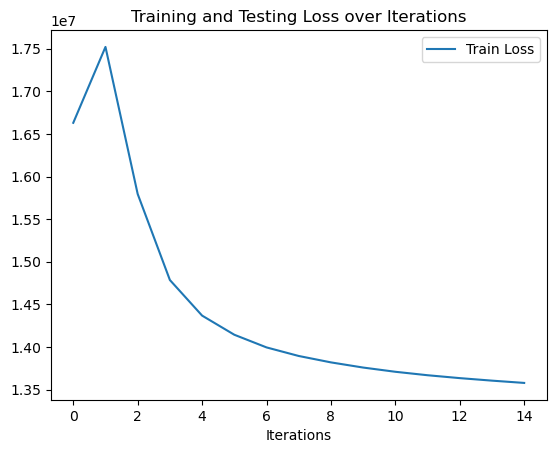

In [31]:
# Plot Loss
plt.plot(train_loss, label="Train Loss")
# plt.plot(test_loss, label="Test Loss")
plt.xlabel("Iterations")
# plt.ylabel("Loss")
plt.title("Training and Testing Loss over Iterations")
plt.legend()
plt.show()

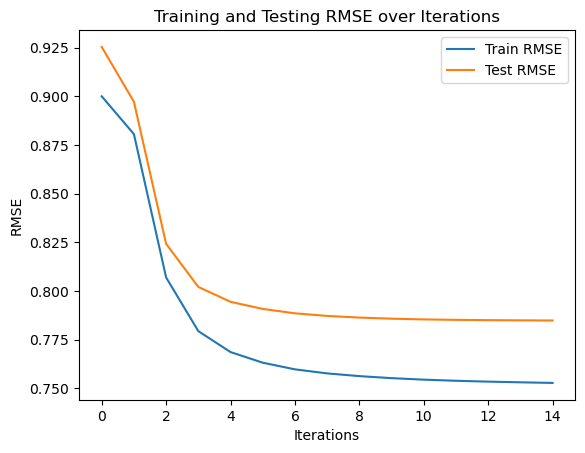

In [60]:
# Plot RMSE
plt.plot(train_rmse, label="Train RMSE")
plt.plot(test_rmse, label="Test RMSE")
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.title("Training and Testing RMSE over Iterations")
plt.legend()
plt.show()

# polalizing movies

In [33]:
from scipy.spatial.distance import cosine

In [37]:
# Load the model
with open("trained_model.pkl", "rb") as f:
    model_params = pickle.load(f)

# Access parameters
user_matrix = model_params["user_matrix"]
movie_matrix = model_params["movie_matrix"]
user_bias = model_params["user_bias"]
movie_bias = model_params["movie_bias"]
user_map = model_params["user_map"]
movie_map = model_params["movie_map"]

print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
# Polarizing Movies
polarizing_movies = []
for movie_id, movie_idx in movie_map.items():
    v_n = V[:, movie_idx]
    vector_length = np.linalg.norm(v_n)
    ratings = [rating for _, rating in data_by_movie[movie_idx]]
    if len(ratings) >= 10:
        variance = np.var(ratings)
        polarizing_movies.append((movie_id, vector_length, variance))

In [ ]:
polarizing_movies = sorted(polarizing_movies, key=lambda x: x[2], reverse=True)
print("\nTop Polarizing Movies:")
for movie_id, length, variance in polarizing_movies[:10]:
    print(f"Movie ID: {movie_id}, Vector Length: {length:.2f}, Variance: {variance:.2f}")


Top Polarizing Movies:
Movie ID: 179819, Vector Length: 2.54, Variance: 2.21
Movie ID: 1483, Vector Length: 3.59, Variance: 2.08
Movie ID: 174, Vector Length: 2.00, Variance: 1.96
Movie ID: 2427, Vector Length: 4.08, Variance: 1.95
Movie ID: 810, Vector Length: 2.58, Variance: 1.90
Movie ID: 177765, Vector Length: 3.18, Variance: 1.86
Movie ID: 69644, Vector Length: 3.59, Variance: 1.86
Movie ID: 2710, Vector Length: 5.32, Variance: 1.86
Movie ID: 737, Vector Length: 1.70, Variance: 1.85
Movie ID: 535, Vector Length: 2.38, Variance: 1.83


In [ ]:
for movie_id, length, variance in polarizing_movies[:10]:
    movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
    print(f"Movie ID: {movie_id}, Title: {movie_title}, Vector Length: {length:.2f}, Variance: {variance:.2f}")


Movie ID: 179819, Title: Star Wars: The Last Jedi (2017), Vector Length: 2.54, Variance: 2.21
Movie ID: 1483, Title: Crash (1996), Vector Length: 3.59, Variance: 2.08
Movie ID: 174, Title: Jury Duty (1995), Vector Length: 2.00, Variance: 1.96
Movie ID: 2427, Title: Thin Red Line, The (1998), Vector Length: 4.08, Variance: 1.95
Movie ID: 810, Title: Kazaam (1996), Vector Length: 2.58, Variance: 1.90
Movie ID: 177765, Title: Coco (2017), Vector Length: 3.18, Variance: 1.86
Movie ID: 69644, Title: Ice Age: Dawn of the Dinosaurs (2009), Vector Length: 3.59, Variance: 1.86
Movie ID: 2710, Title: Blair Witch Project, The (1999), Vector Length: 5.32, Variance: 1.86
Movie ID: 737, Title: Barb Wire (1996), Vector Length: 1.70, Variance: 1.85
Movie ID: 535, Title: Short Cuts (1993), Vector Length: 2.38, Variance: 1.83


In [ ]:
movie_idx = movie_idx_map[movie_id]
ratings = [rating for _, rating in data_by_movie[movie_idx]]
print(f"Ratings for Movie ID {movie_id}: {ratings}")
print(f"Variance: {np.var(ratings):.2f}")


Ratings for Movie ID 535: [5.0, 3.0, 3.0, 5.0, 4.0, 4.0, 2.0, 3.0, 1.5, 4.5, 4.0, 1.0, 3.0, 1.0, 5.0]
Variance: 1.83


In [ ]:
for movie_id, _, _ in polarizing_movies[:10]:
    movie_genres = genres[movie_id]
    print(f"Movie ID: {movie_id}, Genres: {movie_genres}")

Movie ID: 179819, Genres: Action|Adventure|Fantasy|Sci-Fi
Movie ID: 1483, Genres: Drama|Thriller
Movie ID: 174, Genres: Comedy
Movie ID: 2427, Genres: Action|Drama|War
Movie ID: 810, Genres: Children|Comedy|Fantasy
Movie ID: 177765, Genres: Adventure|Animation|Children
Movie ID: 69644, Genres: Action|Adventure|Animation|Children|Comedy|Romance
Movie ID: 2710, Genres: Drama|Horror|Thriller
Movie ID: 737, Genres: Action|Sci-Fi
Movie ID: 535, Genres: Drama


In [ ]:
def compute_similarity(movie_id1, movie_id2):
    vec1 = feature_vectors[:, movie_idx_map[movie_id1]]
    vec2 = feature_vectors[:, movie_idx_map[movie_id2]]
    return 1 - cosine(vec1, vec2)


movie_id1 = 858
movie_id2 = 296
similarity = compute_similarity(movie_id1, movie_id2)
print(f"Similarity between Movie {movie_id1} and Movie {movie_id2}: {similarity:.2f}")

Similarity between Movie 858 and Movie 296: 0.71


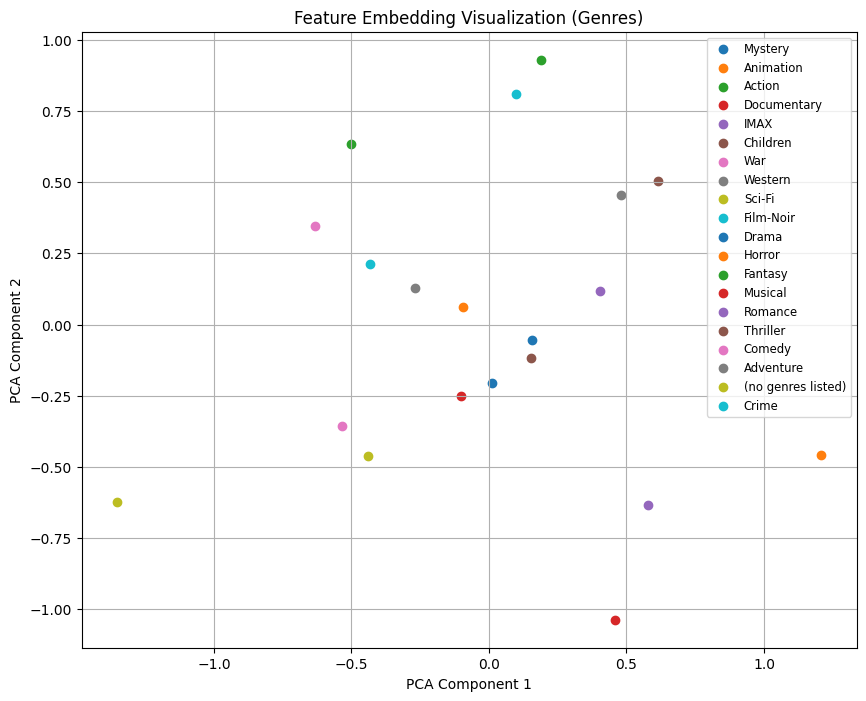

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
W_2D = pca.fit_transform(W.T)

plt.figure(figsize=(10, 8))
for idx, genre in enumerate(genre_list):
    plt.scatter(W_2D[idx, 0], W_2D[idx, 1], label=genre)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Feature Embedding Visualization (Genres)')
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.show()


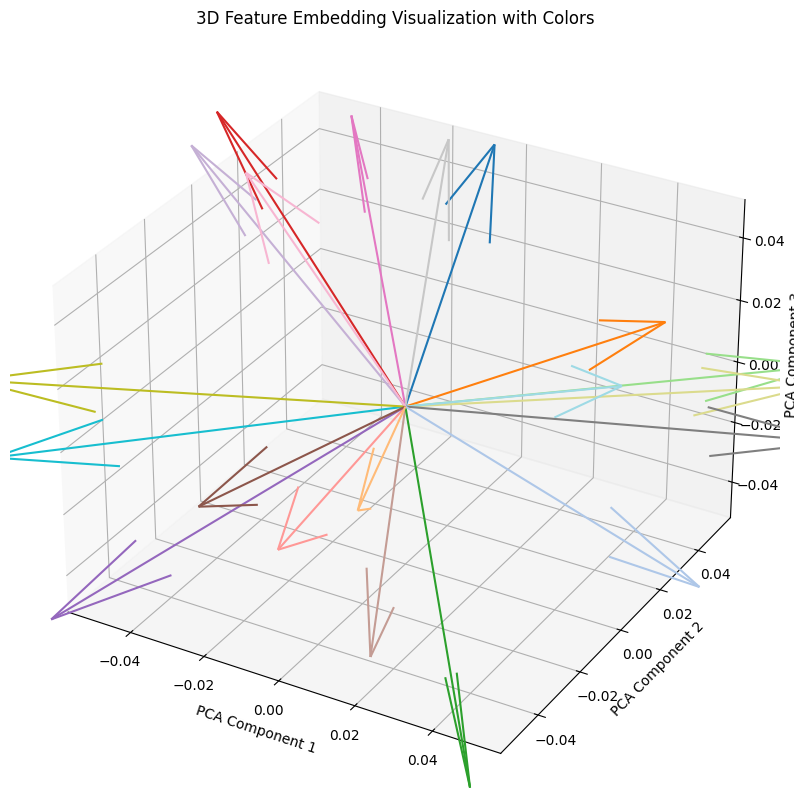

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random

# Reduce dimensions to 3D
pca_3d = PCA(n_components=3)
W_3D = pca_3d.fit_transform(W.T)

random.seed(42)
colors = [plt.cm.tab20(i / len(genre_list)) for i in range(len(genre_list))]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for idx, genre in enumerate(genre_list):
    x, y, z = W_3D[idx]
    ax.quiver(0, 0, 0, x, y, z, color=colors[idx], length=0.1, normalize=True)
    ax.text(x, y, z, genre, fontsize=8, color=colors[idx])

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D Feature Embedding Visualization with Colors')
plt.show()


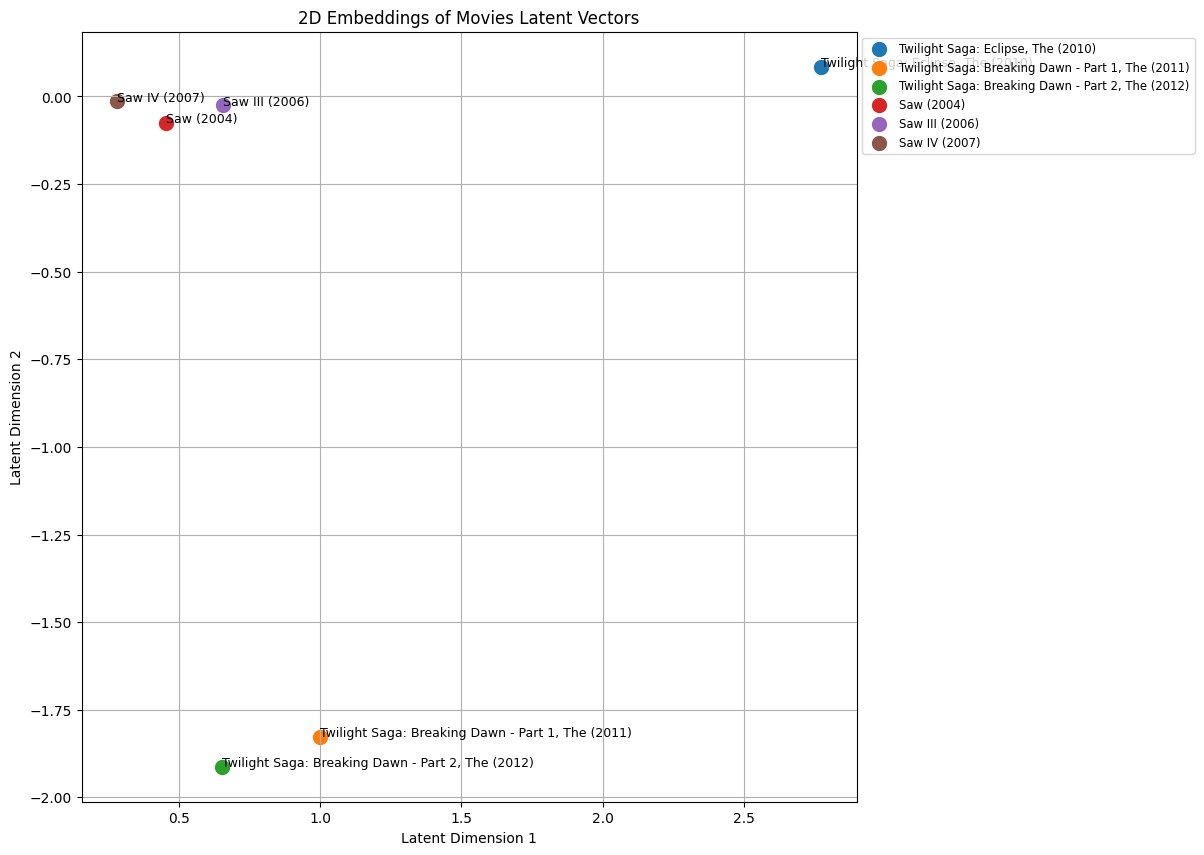

In [ ]:
def plot_movie_embeddings(movie_ids, V, movie_bias, movie_idx_map, movies):
    selected_vectors = np.array([V[:, movie_idx_map[movie_id]] for movie_id in movie_ids])
    selected_biases = np.array([movie_bias[movie_idx_map[movie_id]] for movie_id in movie_ids])

    scaled_vectors = selected_vectors * (0.9 * selected_biases[:, np.newaxis])

    plt.figure(figsize=(10, 10))

    for i, movie_id in enumerate(movie_ids):
        title = movies.loc[movies["movieId"] == movie_id, "title"].iloc[0]

        plt.scatter(scaled_vectors[i, 0], scaled_vectors[i, 1], s=100, label=title)
        plt.text(scaled_vectors[i, 0], scaled_vectors[i, 1], title, fontsize=9)

    plt.title("2D Embeddings of Movies Latent Vectors")
    plt.xlabel("Latent Dimension 1")
    plt.ylabel("Latent Dimension 2")
    plt.legend(loc="upper left", fontsize="small", bbox_to_anchor=(1, 1))
    plt.grid()

    plt.savefig("2d_embeddings.svg")
    plt.show()

movie_ids = [78772, 91104, 98203, 8957, 48877, 55577]

plot_movie_embeddings(movie_ids, V, movie_bias, movie_idx_map, movies)


# A/B Testing

In [51]:
model_file = "trained_model.pkl"  

with open(model_file, "rb") as f:
    model_params = pickle.load(f)

user_matrix = model_params["user_matrix"]    
movie_matrix = model_params["movie_matrix"]  
user_bias = model_params["user_bias"]         
movie_bias = model_params["movie_bias"]       
user_map = model_params["user_map"]           
movie_map = model_params["movie_map"]       

print("Model loaded successfully!")
print(f"user_matrix shape: {user_matrix.shape}")
print(f"movie_matrix shape: {movie_matrix.shape}")
print(f"user_bias shape: {user_bias.shape}")
print(f"movie_bias shape: {movie_bias.shape}")
print(f"Number of mapped users: {len(user_map)}")
print(f"Number of mapped movies: {len(movie_map)}")


Model loaded successfully!
user_matrix shape: (162542, 10)
movie_matrix shape: (59047, 10)
user_bias shape: (162542,)
movie_bias shape: (59047,)
Number of mapped users: 162541
Number of mapped movies: 59047


In [52]:
import csv
import os
import random

from scipy.stats import chi2_contingency

In [53]:
def create_reco(
    user_id,
    user_map,
    user_matrix,
    user_bias,
    movie_matrix,
    movie_bias,
    movie_map,
    top_k=10
):
    if user_id not in user_map:
        raise ValueError(f"User ID {user_id} not found in user_map.")
    
    uidx = user_map[user_id]  

    if uidx >= user_matrix.shape[0]:
        raise ValueError(f"user_map gave index={uidx}, but user_matrix has shape {user_matrix.shape}")

    # Calculate scores for all movies
    user_vec = user_matrix[uidx]
    b_u = user_bias[uidx]

    scored_movies = []
    for m_id, m_idx in movie_map.items():
        if m_idx < movie_matrix.shape[0]:
            b_i = movie_bias[m_idx]
            score = b_u + b_i + np.dot(user_vec, movie_matrix[m_idx])
            scored_movies.append((m_id, score))

    # Sort descending by score
    scored_movies.sort(key=lambda x: x[1], reverse=True)

    # Return top_k movie IDs
    recommended_movies = [x[0] for x in scored_movies[:top_k]]
    return recommended_movies

In [54]:
def log_feedback(user_id, movie_id, feedback, version_id, log_file='feedback_log.csv'):
    file_exists = os.path.isfile(log_file)
    with open(log_file, 'a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["user_id", "movie_id", "feedback", "version_id"])
        writer.writerow([user_id, movie_id, feedback, version_id])


In [55]:
log_file_path = "feedback_log.csv"
if os.path.exists(log_file_path):
    os.remove(log_file_path)

all_user_ids = list(user_map.keys())
random.shuffle(all_user_ids)

sample_size = 100 
sampled_users = all_user_ids[:sample_size]

mid = sample_size // 2
group_A = sampled_users[:mid]
group_B = sampled_users[mid:]

prob_like_A = 0.70
prob_like_B = 0.60

for user_id in sampled_users:
    version_id = "A" if user_id in group_A else "B"

    try:
        recommended = create_reco(
            user_id,
            user_map,
            user_matrix,
            user_bias,
            movie_matrix,
            movie_bias,
            movie_map,
            top_k=10
        )

        # Simulate feedback for each recommended movie
        for movie_id in recommended:
            if version_id == 'A':
                feedback = np.random.choice(['like', 'dislike'], p=[prob_like_A, 1 - prob_like_A])
            else:
                feedback = np.random.choice(['like', 'dislike'], p=[prob_like_B, 1 - prob_like_B])

            # Log
            log_feedback(user_id, movie_id, feedback, version_id, log_file=log_file_path)

    except ValueError as e:
        print(f"Error for user {user_id}: {e}")

print(f"A/B test simulation complete. Logged feedback in '{log_file_path}'.")


A/B test simulation complete. Logged feedback in 'feedback_log.csv'.


Sample of logged feedback:
     user_id  movie_id feedback version_id
0  130806.0  179379.0     like          A
1  130806.0  132468.0     like          A
2  130806.0  140441.0     like          A
3  130806.0  124131.0     like          A
4  130806.0   25990.0     like          A

Feedback counts by version:
 feedback    dislike  like
version_id               
A               147   353
B               195   305

=== Chi-Square Test ===
Chi-Square Statistic: 9.8162
p-value: 0.001730
Degrees of Freedom: 1
Expected counts:
 [[171. 329.]
 [171. 329.]]


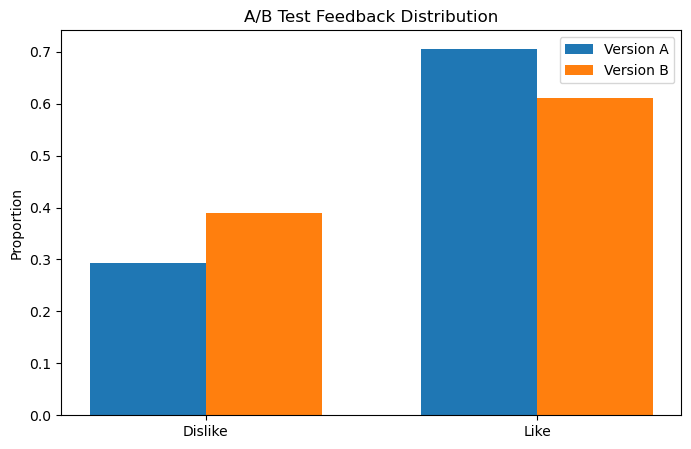

In [56]:
df = pd.read_csv(log_file_path)
print("Sample of logged feedback:\n", df.head())

# Summarize feedback counts by version
feedback_counts = df.groupby(['version_id', 'feedback']).size().unstack(fill_value=0)
print("\nFeedback counts by version:\n", feedback_counts)

dislike_A = feedback_counts.loc['A', 'dislike']
like_A    = feedback_counts.loc['A', 'like']
dislike_B = feedback_counts.loc['B', 'dislike']
like_B    = feedback_counts.loc['B', 'like']

contingency_table = [
    [dislike_A, like_A],
    [dislike_B, like_B]
]

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\n=== Chi-Square Test ===")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"p-value: {p:.6f}")
print(f"Degrees of Freedom: {dof}")
print("Expected counts:\n", expected)

# Plot proportions
total_A = dislike_A + like_A
total_B = dislike_B + like_B
prop_dislike_A = dislike_A / total_A if total_A else 0
prop_like_A    = like_A / total_A if total_A else 0
prop_dislike_B = dislike_B / total_B if total_B else 0
prop_like_B    = like_B / total_B if total_B else 0

labels = ['Dislike', 'Like']
width = 0.35
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8,5))

ax.bar(x - width/2, [prop_dislike_A, prop_like_A], width, label='Version A')
ax.bar(x + width/2, [prop_dislike_B, prop_like_B], width, label='Version B')

ax.set_ylabel('Proportion')
ax.set_title('A/B Test Feedback Distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
